## Load libraries

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import sklearn
from sklearn import datasets
import matplotlib.pyplot as plt
import numpy as np
import igraph as ig

from sklearn.cluster import DBSCAN

from giotto.mapper.cover import CubicalCover
from giotto.mapper.mapper import make_mapper_pipeline
from giotto.mapper.filter import Projection
from giotto.mapper.visualize import create_network_2d, create_network_3d, create_interactive_network

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

## Simulate data

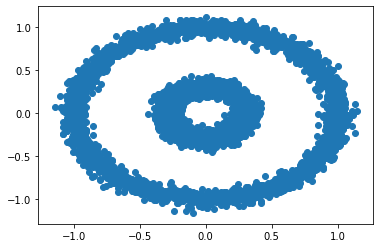

In [3]:
data, labels = datasets.make_circles(n_samples=5000, noise=0.05, factor=0.3, random_state=42)
plt.scatter(data[:,0], data[:, 1]);

## Configure Mapper pipeline

In [4]:
# define filter function - can be any scikit-learn Transformer
filter_func = Projection(column_indices=[0,1])
# define cover - only one type is available at the moment
cover = CubicalCover(n_intervals=10, overlap_frac=0.3)
# choose clustering algorithm - default is DBSCAN
clusterer = DBSCAN(eps=0.5)

In [5]:
# initialise pipeline
n_jobs_outer = 1

pipe = make_mapper_pipeline(filter_func=filter_func,
                            cover=cover,
                            clusterer=clusterer,
                            verbose=True,
                            n_jobs_outer=n_jobs_outer)

## Run Mapper pipeline

In [6]:
graph = pipe.fit_transform(data)

[Pipeline] ............ (step 1 of 3) Processing scaler, total=   0.0s
[Pipeline] ....... (step 2 of 3) Processing filter_func, total=   0.0s
[Pipeline] ............. (step 3 of 3) Processing cover, total=   0.1s
[Pipeline] .... (step 1 of 3) Processing pullback_cover, total=   0.1s
[Pipeline] ........ (step 2 of 3) Processing clustering, total=   0.1s
[Pipeline] ............. (step 3 of 3) Processing nerve, total=   0.1s


## Visualise 2D Mapper graph

The graph has metadata about the nodes etc that can be accessed as a dictionary:

In [9]:
graph['node_metadata'].keys()

dict_keys(['node_id', 'interval_id', 'cluster_id', 'node_elements'])

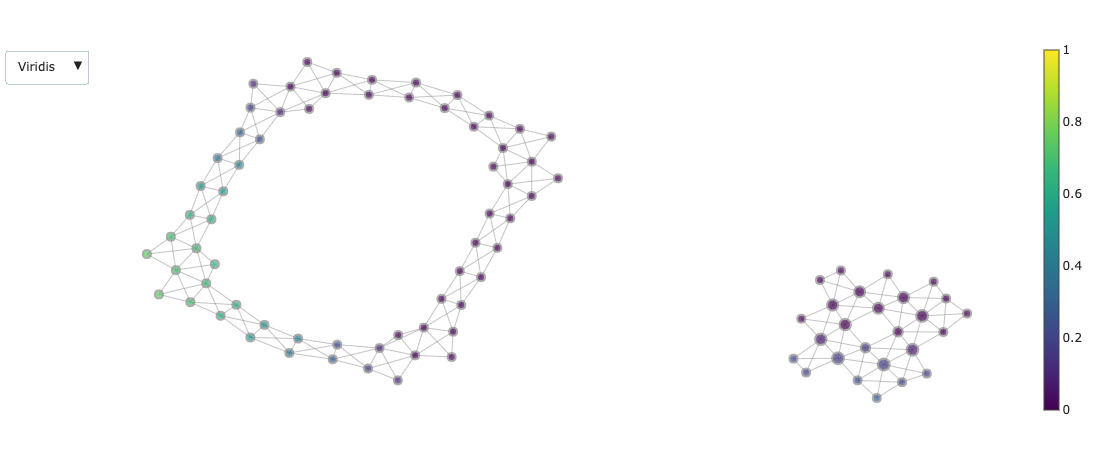

In [10]:
# get cluster member indices
node_elements = graph['node_metadata']['node_elements']
# calculate number of members per node
node_sizes = [len(el) for el in node_elements]
# define node coloring by mean value
node_colors = [np.mean(data[el]) for el in node_elements]
# configure choice of layout
layout = graph.layout('kk', dim=2)
# initialise figure
fig = create_network_2d(graph, layout, node_colors, node_scale=12)
# display figure
fig.show()

## Visualise 3D Mapper graph

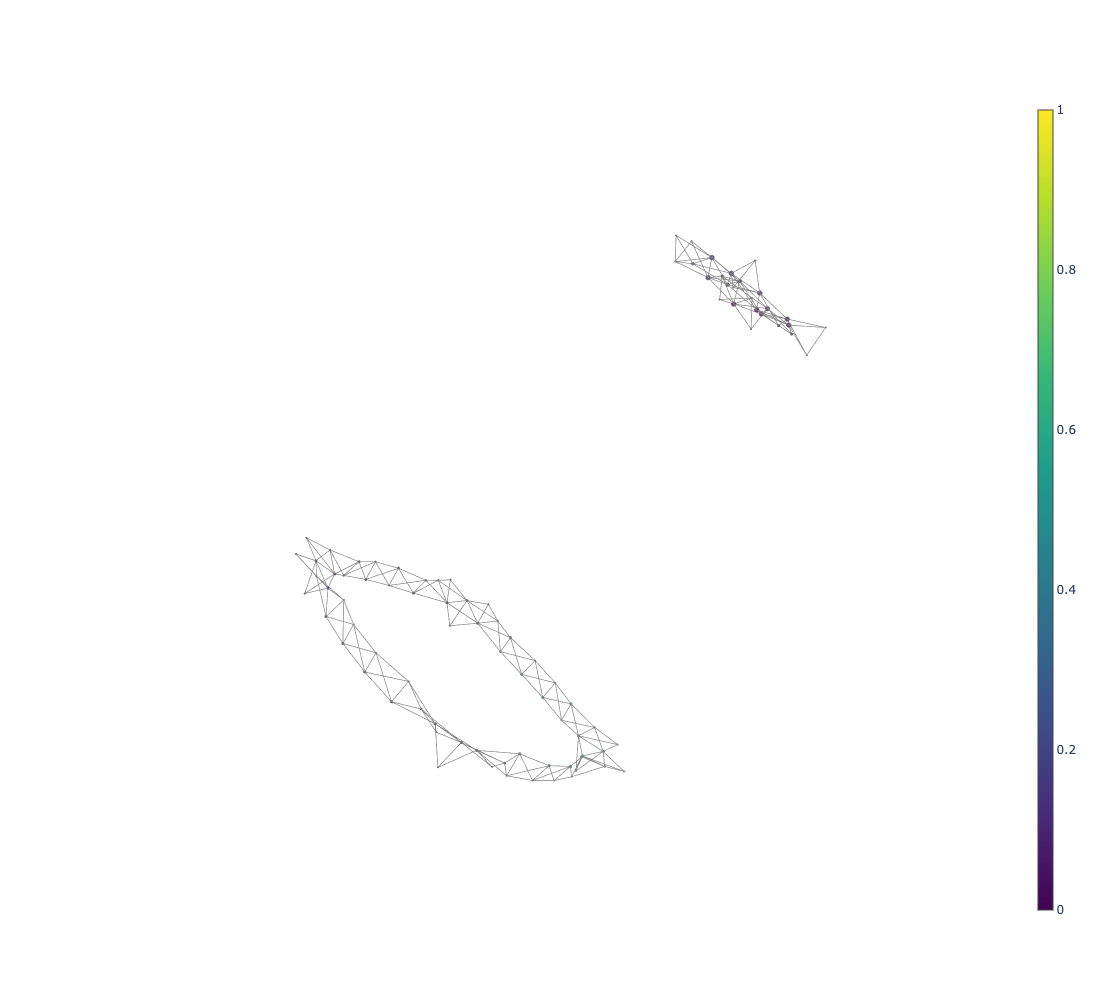

In [11]:
# get cluster member indices
node_elements = graph['node_metadata']['node_elements']
# calculate number of members per node
node_sizes = [len(el) for el in node_elements]
# define node coloring by mean value
node_colors = [np.mean(data[el]) for el in node_elements]
# configure choice of layout
layout = graph.layout('kk', dim=3)
# initialise figure
fig = create_network_3d(graph, layout, node_colors, node_scale=12)
# display figure
fig.show()

## Visualise interactive Mapper graph

In [12]:
create_interactive_network(pipe, data)

[Pipeline] ............ (step 1 of 3) Processing scaler, total=   0.0s
[Pipeline] ....... (step 2 of 3) Processing filter_func, total=   0.0s
[Pipeline] ............. (step 3 of 3) Processing cover, total=   0.0s
[Pipeline] .... (step 1 of 3) Processing pullback_cover, total=   0.0s
[Pipeline] ........ (step 2 of 3) Processing clustering, total=   0.1s
[Pipeline] ............. (step 3 of 3) Processing nerve, total=   0.1s


Output()